# Penguin Species Detection using Sklearn- By Sujan Neupane

In [78]:
# Lets import all our necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [79]:
rd = pd.read_csv('Iris.csv')

In [80]:
df = pd.DataFrame(rd)
df.dropna(inplace = True)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [81]:
species = dict(df.Species.value_counts())
species = list(species)
species

['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']

In [82]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [83]:
cols = ['SepalLengthCm','SepalLengthCm','SepalLengthCm','SepalLengthCm']
X = df[cols].values
y = list(df.Species.values)

In [84]:
indexes = [0,1,2]
y = np.array([indexes[species.index(i)] for i in y])

In [85]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


# We will use KNN model for this problem 
    # TRAIN_TEST_SPLIT is used to simulate the prediction based on off-sample Data

In [86]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = 1, test_size=0.4)

In [87]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


In [88]:
# When K = 1 
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [89]:
pred = knn.predict([[6.2, 3.4, 5.4, 2.3]])
species[int(pred)]

'Iris-setosa'

In [90]:
y_pred = knn.predict(x_test)

In [91]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.6

In [92]:
# When k = 5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.6333333333333333

# Lets find out the best value of k

In [93]:
score = []
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    score.append(metrics.accuracy_score(y_test,y_pred))

In [94]:
np.array(score).mean()

0.6791666666666667

In [95]:
score.index(max(score))

18

In [96]:
print('when k = '+str(score.index(max(score))+1)+ ' ,the accuracy is highest for this model')

when k = 19 ,the accuracy is highest for this model


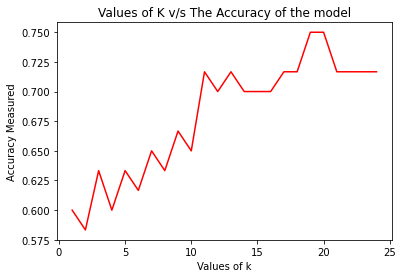

In [97]:
plt.plot(range(1,25),score,color='red')
plt.title('Values of K v/s The Accuracy of the model')
plt.xlabel('Values of k')
plt.ylabel('Accuracy Measured')
plt.show()

In [98]:
print('Our best accuracy for this model is '+str(max(score)*100)+' % at the best when '+str(score.index(max(score))+1) +' ,which is fine enough.')

Our best accuracy for this model is 75.0 % at the best when 19 ,which is fine enough.


# Lets use cross validation instead of train_test_split

In [99]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors = 19)
scores = cross_val_score(knn,X,y, cv=10,scoring='accuracy')
scores

array([0.66666667, 0.6       , 0.66666667, 0.6       , 0.73333333,
       0.66666667, 0.8       , 0.73333333, 0.86666667, 0.8       ])

In [100]:
scores.mean()

0.7133333333333334

In [101]:
# Now, lets search for the best value of k
k_scores = []
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(knn,X,y, cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.5533333333333332, 0.5666666666666667, 0.6666666666666667, 0.6466666666666666, 0.6799999999999999, 0.6533333333333332, 0.6933333333333334, 0.6733333333333332, 0.6933333333333332, 0.6666666666666665, 0.7, 0.6599999999999999, 0.7266666666666666, 0.6933333333333334, 0.7133333333333333, 0.7133333333333333, 0.7133333333333334, 0.7, 0.7133333333333334, 0.7133333333333334, 0.7, 0.7066666666666666, 0.7066666666666666, 0.72, 0.7133333333333334, 0.7, 0.7133333333333334, 0.7066666666666666, 0.7, 0.7066666666666666]


In [102]:
print(k_scores.index(max(k_scores))+1)

13


In [103]:
print('when k = '+str(k_scores.index(max(k_scores))+1)+ ' ,the accuracy is highest for this model using cross-validation.')

when k = 13 ,the accuracy is highest for this model using cross-validation.


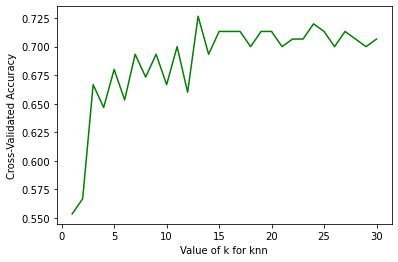

In [104]:
import matplotlib.pyplot as plt
#plot the value of k for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(range(1,31),k_scores,color='green')
plt.xlabel("Value of k for knn")
plt.ylabel("Cross-Validated Accuracy")
plt.show()

# Thank you